## Líneas de campo eléctrico

Matplotlib provee una función llamada `streamplot` que puede usarse para representar vectores de campo. El código python muestra la representación de un campo eléctrico a partir de múltiples cargas seleccionadas como potencia de 2 (1 dipolo, 2 cuadrupolo, etc).

Se tiene una variable `count` la cual define la cantidad de cargas, en el primer caso vale 1 (dipolo). Se puede ampliar este valor a 4 (8 polos), 10 (20 polos)...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def E(q, r0, x, y):
    """
    Retorna el vector de campo eléctrico E=(Ex, Ey) de una carga q en r0
    """
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

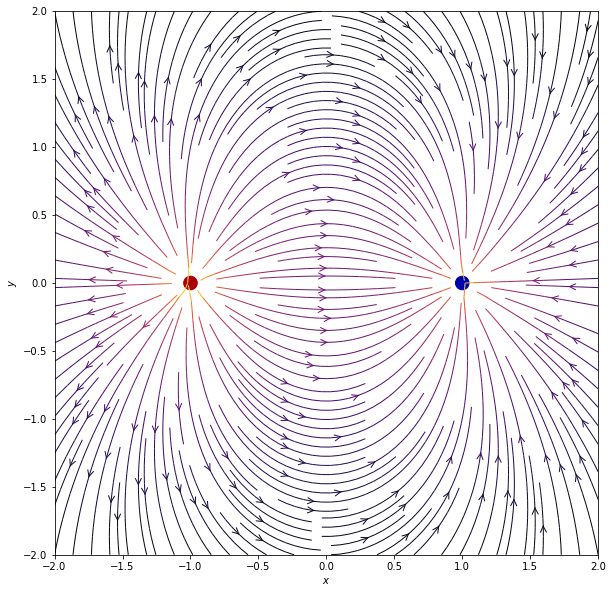

In [2]:
nx, ny = 64, 64
limit = 2
x = np.linspace(-limit, limit, nx)
y = np.linspace(-limit, limit, ny)
X, Y = np.meshgrid(x, y)

# Crear un multipolo con nq cargas
count = 1 # número de q. En ese caso es 1 (dipolo)
nq = 2**int(count)
charges = []

for i in range(nq):
    q = i%2 * 2 - 1
    charges.append(
        (
            q, (
                np.cos(2*np.pi*i/nq),
                np.sin(2*np.pi*i/nq)
                )
        )
    )

# Vector de campo eléctrico como componentes separados (Ex, Ey)
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Dibujar las líneas de flujo con mapa de colores y estilos
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, 
              y, 
              Ex, 
              Ey, 
              color=color, 
              linewidth=1, 
              cmap=plt.cm.inferno, 
              density=2, 
              arrowstyle="->", 
              arrowsize=1.5)

# Agregar circulos para las cargas
charge_colors = {
    True: "#aa0000",
    False: "#0000aa"
}

for q, pos in charges:
    ax.add_artist(
        Circle(
            pos,
            0.05,
            color=charge_colors[q>0]
        )
    )
    
# Graficar
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)
ax.set_aspect("equal")
plt.show()